In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [123]:
#[1,2,3]*5
np.asarray([1,2,3])*5
#np.array([1,2,3])

array([1, 2, 3])

Text(0, 0.5, 'amplitud')

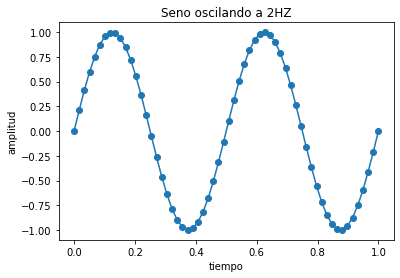

In [27]:
# Frequency = 1/Periodo
F = 2 # in Hz
t = np.linspace(0,1, 60)
y = np.sin(2*np.pi*F*t) #  f(t) = sin(2·pi·ω·t)

# Sensor de temperatura
temp = y

plt.title(f"Seno oscilando a {F}HZ")
plt.plot(t,y,'o-')
plt.xlabel("tiempo")
plt.ylabel("amplitud")

Text(0, 0.5, 'amplitud')

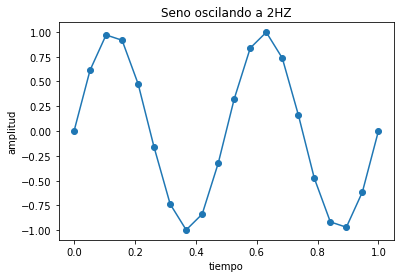

In [29]:

# Sensor de humedad
t2 = np.linspace(0,1,20)
F = 2
humedad = np.sin(2*np.pi*F*t2)
plt.title(f"Seno oscilando a {F}HZ")
plt.plot(t2, humedad,'o-')
plt.xlabel("tiempo")
plt.ylabel("amplitud")

60 20


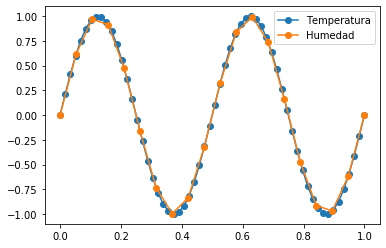

In [37]:
# Ploteamos los dos graficos
print(len(t),len(t2))
plt.plot(t,temp,'o-')
plt.plot(t2, humedad,'o-')
plt.legend(["Temperatura","Humedad"])

In [35]:
#plt.plot(t3, temp - humedad)
#temp - humedad <- ERROR: We have to interpolate first

ValueError: operands could not be broadcast together with shapes (60,) (20,) 

In [51]:
from scipy.interpolate import interp1d

fn = interp1d(t2,humedad, kind="nearest")

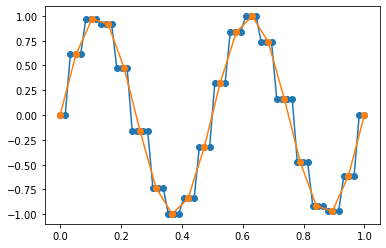

In [53]:
humedad_interp = fn(t)
len(humedad_interp)

plt.plot(t, humedad_interp,'-o')
plt.plot(t2, humedad,'-o')

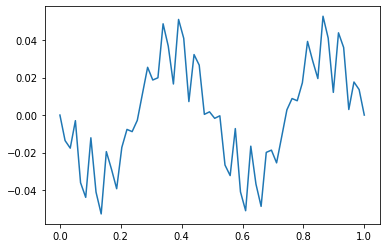

In [50]:
plt.plot(t, humedad_interp-temp)

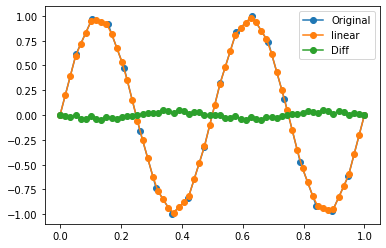

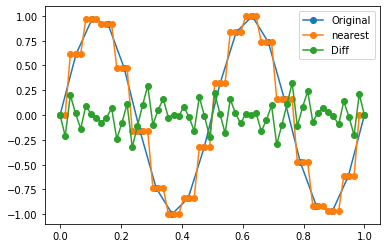

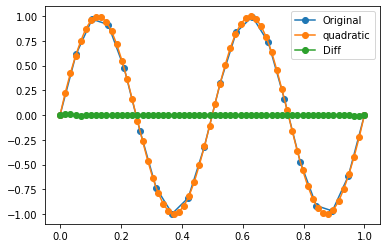

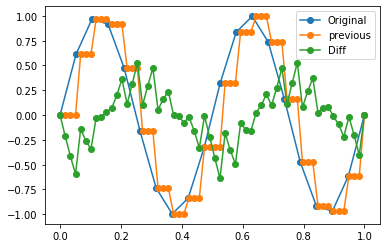

In [63]:
from scipy.interpolate import interp1d

interpolationModes = ["linear","nearest","quadratic","previous"]
for interp in interpolationModes:
    fn = interp1d(t2,humedad, kind=interp)
    humedad_interp = fn(t)
    plt.figure()
    plt.plot(t2, humedad,'-o')
    plt.plot(t, humedad_interp,'-o')
    plt.plot(t, humedad_interp-temp,'-o')

    plt.legend(["Original", interp, "Diff"])

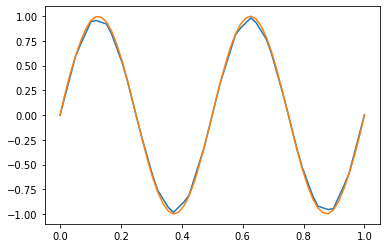

In [66]:
fn = interp1d(t2,humedad, kind="linear")
fn2 = interp1d(t2,humedad, kind="quadratic")
y_lin = fn(t)
y_quad = fn2(t)
plt.plot(t,y_lin)
plt.plot(t,y_quad)

In [67]:
t

array([0.        , 0.01694915, 0.03389831, 0.05084746, 0.06779661,
       0.08474576, 0.10169492, 0.11864407, 0.13559322, 0.15254237,
       0.16949153, 0.18644068, 0.20338983, 0.22033898, 0.23728814,
       0.25423729, 0.27118644, 0.28813559, 0.30508475, 0.3220339 ,
       0.33898305, 0.3559322 , 0.37288136, 0.38983051, 0.40677966,
       0.42372881, 0.44067797, 0.45762712, 0.47457627, 0.49152542,
       0.50847458, 0.52542373, 0.54237288, 0.55932203, 0.57627119,
       0.59322034, 0.61016949, 0.62711864, 0.6440678 , 0.66101695,
       0.6779661 , 0.69491525, 0.71186441, 0.72881356, 0.74576271,
       0.76271186, 0.77966102, 0.79661017, 0.81355932, 0.83050847,
       0.84745763, 0.86440678, 0.88135593, 0.89830508, 0.91525424,
       0.93220339, 0.94915254, 0.96610169, 0.98305085, 1.        ])

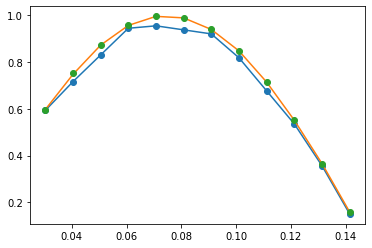

In [104]:
plt.plot(t[3:15],y_lin[3:15],'o-')
plt.plot(t[3:15],y_quad[3:15])
plt.plot(t[3:15],temp[3:15],'o')

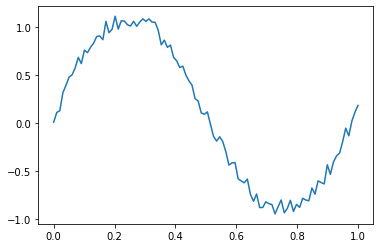

In [116]:
t = np.linspace(0,1,100)
r = np.random.random(len(t))
y = np.sin(2*np.pi*t) + r* 0.2
plt.plot(t,y)

# Exporting data to tableau

In [117]:
import pandas as pd
df = pd.DataFrame({
    "time": t,
    "measure": y
})

In [118]:
df.to_csv("data/exported/sine_with_noise.csv", index=False)

In [119]:
df.to_json("data/exported/better_sine_with_noise.json", orient="records")